# **Author - Mohamed Ali**
## GRIP @ The Sparks Foundation
### Task-7 Stock Market Prediction using Numerical and Textual Analysis
In this task I tried to create a model for stock performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.


Date : 12-05-2023

**Datasets used**


*   Historical stock prices :https://finance.yahoo.com/

*   Textual news headlines : https://bit.ly/36fFPI6


In [33]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
from google.colab import drive
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge, LinearRegression
from sklearn import neighbors
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle
import time
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#  **Step 1 : Importing the Numerical dataset**

In [2]:
import yfinance as yf
#since our Textual Analysis dataset containing news from Times of India News Headlines is only till 31-03-2022. 
#So we will assume today is 31-03-2022. 
bsesn = yf.download('^BSESN', start='2001-01-02', end='2022-04-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 2: Feature Engineering**

In [4]:
bsesn.to_csv('BSESN.csv')
bsesn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5235 entries, 2001-01-02 to 2022-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5235 non-null   float64
 1   High       5235 non-null   float64
 2   Low        5235 non-null   float64
 3   Close      5235 non-null   float64
 4   Adj Close  5235 non-null   float64
 5   Volume     5235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 286.3 KB


In [5]:
bsesn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100


### **Step 2.1 : 2.1 Stock Price Data**

In [6]:
# Reset Data as a Column
bsesn.reset_index(inplace=True)
bsesn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...,...
5230,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
5231,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
5232,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
5233,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


In [7]:
# Dropping duplicates
bsesn = bsesn.drop_duplicates()

# Converting Date column to datetime datatype
bsesn['Date'] = pd.to_datetime(bsesn['Date'])

# sorting the data according to the index i.e 'Date'
bsesn = bsesn.sort_values(by='Date',ascending=True, axis=0)
bsesn.to_csv('/content/drive/MyDrive/GRIP Projects/BSESN.csv')
bsesn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...,...
5230,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
5231,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
5232,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
5233,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


### **Step : 2.2 Stock News Headlines Data**

In [8]:
# reading the datasets into pandas

news = pd.read_csv('/content/drive/MyDrive/GRIP Projects/india-news-headlines.csv')
news

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [9]:
# Converting Date column to datetime datatype
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')

# Grouping the headlines for each day
news = news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)

# Renaming publish_data to Date
news.rename(columns={'publish_date': 'Date'}, inplace = True)

# sorting the data according to 'Date'
news = news.sort_values(by='Date',ascending=True, axis=0)
news.to_csv('/content/drive/MyDrive/GRIP Projects/news.csv')
news

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,"I will not give in to trends: Dossmode,The tim..."


### **Step 2.3 Calculating Sentiment Scores**

In [10]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [11]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['headline_text'].apply(getSubjectivity)
news['Polarity'] = news['headline_text'].apply(getPolarity)
news

,Date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725
1,2001-01-03,"Powerless north India gropes in the dark,Think...",0.458333,0.108333
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492
3,2001-01-05,Light combat craft takes India into club class...,0.458870,0.252557
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369780,0.030512
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.383737,0.053177
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.402145,0.086509
7715,2022-03-30,"I will not give in to trends: Dossmode,The tim...",0.354163,0.037741


In [12]:
#Adding sentiment score to df_news
_ = SentimentIntensityAnalyzer()

news['Compound'] = [_.polarity_scores(v)['compound'] for v in news['headline_text']]
news['Negative'] = [_.polarity_scores(v)['neg'] for v in news['headline_text']]
news['Neutral'] = [_.polarity_scores(v)['neu'] for v in news['headline_text']]
news['Positive'] = [_.polarity_scores(v)['pos'] for v in news['headline_text']]
news

,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725,-0.9426,0.108,0.820,0.072
1,2001-01-03,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
3,2001-01-05,Light combat craft takes India into club class...,0.458870,0.252557,0.9892,0.103,0.740,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,0.4404,0.118,0.709,0.172
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.369780,0.030512,-0.9999,0.136,0.789,0.075
7713,2022-03-28,As fashion becomes democratic; demand for styl...,0.383737,0.053177,-0.9999,0.151,0.763,0.086
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.402145,0.086509,-0.9998,0.131,0.789,0.080
7715,2022-03-30,"I will not give in to trends: Dossmode,The tim...",0.354163,0.037741,-0.9999,0.130,0.806,0.063


### **Step 2.4 Combined Stock Data**

In [13]:
df_m = pd.merge(bsesn, news, how='inner', on='Date')
# setting column 'Date' as the index column
df_m.set_index('Date', inplace= True)
df_m.to_csv('/content/drive/MyDrive/df_m.csv')
df_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5206 entries, 2001-01-02 to 2022-03-31
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           5206 non-null   float64
 1   High           5206 non-null   float64
 2   Low            5206 non-null   float64
 3   Close          5206 non-null   float64
 4   Adj Close      5206 non-null   float64
 5   Volume         5206 non-null   int64  
 6   headline_text  5206 non-null   object 
 7   Subjectivity   5206 non-null   float64
 8   Polarity       5206 non-null   float64
 9   Compound       5206 non-null   float64
 10  Negative       5206 non-null   float64
 11  Neutral        5206 non-null   float64
 12  Positive       5206 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 569.4+ KB


# **Step 3 : Finalising Stock Data and writing to Disk**

In [14]:
df = df_m[['Close', 'Open', 'High', 'Low', 'Volume','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0,0.254902,0.113725,-0.9426,0.108,0.820,0.072
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0,0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0,0.458870,0.252557,0.9892,0.103,0.740,0.157
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0,0.308747,-0.017149,-0.9898,0.123,0.858,0.018
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,57362.199219,57801.718750,57845.371094,57100.238281,6900,0.374713,0.003142,-0.9999,0.160,0.774,0.066
2022-03-28,57593.488281,57472.718750,57638.339844,56825.089844,6300,0.383737,0.053177,-0.9999,0.151,0.763,0.086
2022-03-29,57943.648438,57814.761719,58001.531250,57639.351562,12100,0.402145,0.086509,-0.9998,0.131,0.789,0.080


In [15]:
df.to_csv('/content/drive/MyDrive/Combined_Data.csv')

# **Step 4 : Feature Engineering of Stock Data**

In [17]:
# displaying the shape i.e. number of rows and columns of Dataframe
df.shape

(5206, 11)

In [18]:
# checking for null values
df.isna().any()

Close           False
Open            False
High            False
Low             False
Volume          False
Subjectivity    False
Polarity        False
Compound        False
Negative        False
Neutral         False
Positive        False
dtype: bool

In [19]:
# displaying stock_data statistics
df.describe(include='all')

,Close,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
count,5206.000000,5206.000000,5206.000000,5206.000000,5.206000e+03,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,20810.314280,20832.609907,20954.826275,20668.018042,7.659583e+04,0.398148,0.069468,-0.881093,0.126912,0.787074,0.086020
std,13839.902579,13858.163514,13910.969470,13767.003243,1.037427e+06,0.040959,0.040663,0.436521,0.023775,0.032520,0.020599
min,2600.120117,2621.889893,2682.590088,2594.870117,0.000000e+00,0.000000,-0.350000,-1.000000,0.000000,0.000000,0.000000
25%,9568.284668,9551.897217,9680.019775,9428.635254,9.200000e+03,0.378054,0.046890,-0.999800,0.113250,0.767000,0.075000
50%,18226.415039,18238.309570,18365.939453,18090.094727,1.370000e+04,0.397624,0.067810,-0.999300,0.128000,0.783000,0.086000
75%,28553.659180,28625.832031,28798.297363,28426.820801,2.040000e+04,0.417814,0.090263,-0.995300,0.142000,0.805000,0.096000
max,61765.589844,62156.480469,62245.429688,61624.648438,3.181510e+07,1.000000,0.500000,1.000000,0.444000,1.000000,0.608000


In [20]:
# displaying stock_data information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5206 entries, 2001-01-02 to 2022-03-31
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         5206 non-null   float64
 1   Open          5206 non-null   float64
 2   High          5206 non-null   float64
 3   Low           5206 non-null   float64
 4   Volume        5206 non-null   int64  
 5   Subjectivity  5206 non-null   float64
 6   Polarity      5206 non-null   float64
 7   Compound      5206 non-null   float64
 8   Negative      5206 non-null   float64
 9   Neutral       5206 non-null   float64
 10  Positive      5206 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 488.1 KB


# **Step 6 : EDA & PCA of Stock Data**

In [26]:
# Perform EDA
print(df.shape)
print(df.describe())

(5206, 11)
              Close          Open          High           Low        Volume  \
count   5206.000000   5206.000000   5206.000000   5206.000000  5.206000e+03   
mean   20810.314280  20832.609907  20954.826275  20668.018042  7.659583e+04   
std    13839.902579  13858.163514  13910.969470  13767.003243  1.037427e+06   
min     2600.120117   2621.889893   2682.590088   2594.870117  0.000000e+00   
25%     9568.284668   9551.897217   9680.019775   9428.635254  9.200000e+03   
50%    18226.415039  18238.309570  18365.939453  18090.094727  1.370000e+04   
75%    28553.659180  28625.832031  28798.297363  28426.820801  2.040000e+04   
max    61765.589844  62156.480469  62245.429688  61624.648438  3.181510e+07   

       Subjectivity     Polarity     Compound     Negative      Neutral  \
count   5206.000000  5206.000000  5206.000000  5206.000000  5206.000000   
mean       0.398148     0.069468    -0.881093     0.126912     0.787074   
std        0.040959     0.040663     0.436521     0.

<Axes: >

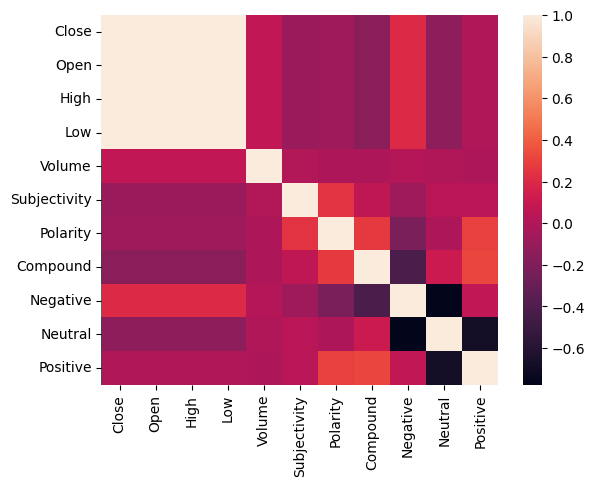

In [27]:
sns.heatmap(df.corr())

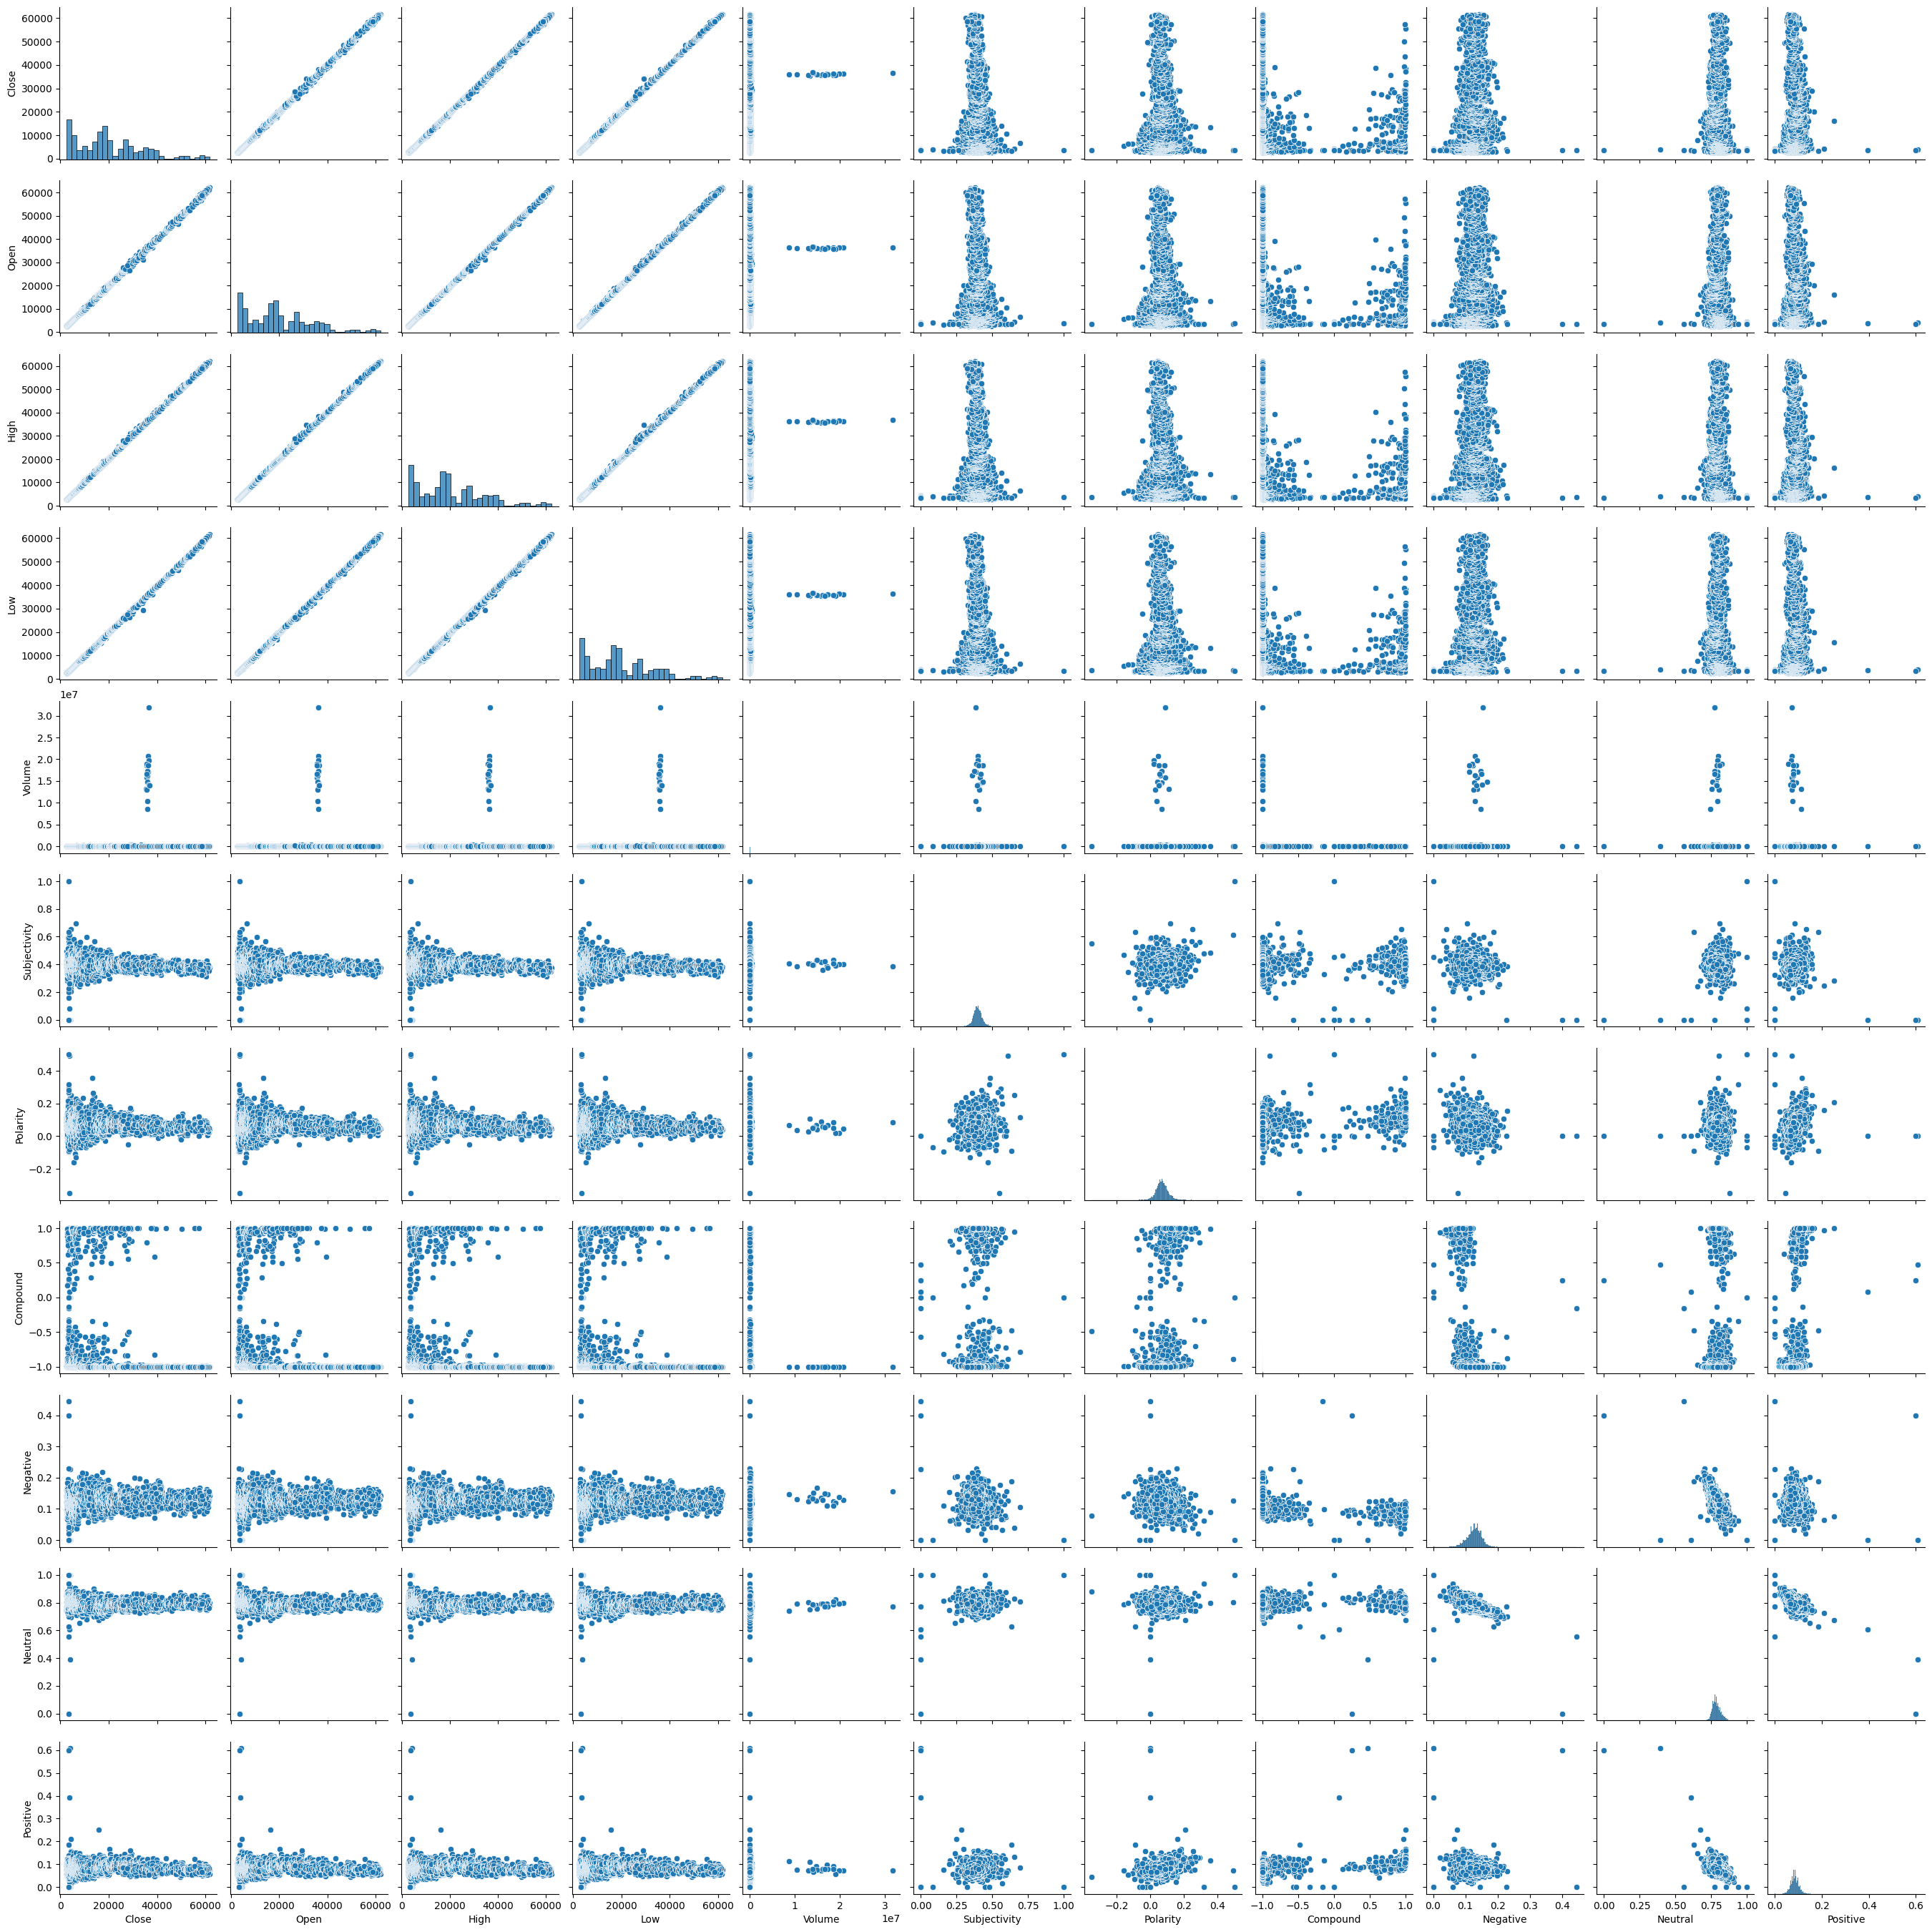

In [28]:
sns.pairplot(df)

In [34]:
# Perform PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_)

[0.38067206 0.18207545]


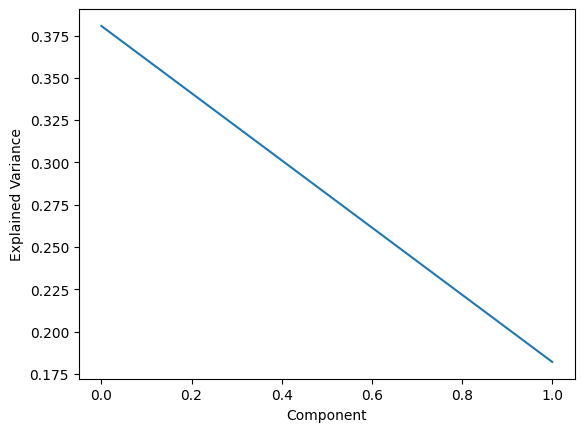

<Axes: >

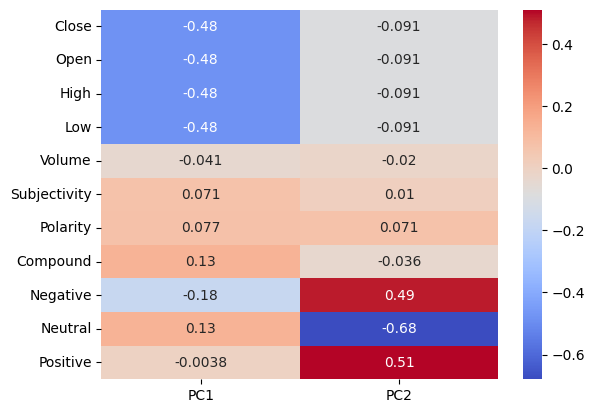

In [35]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.columns)
sns.heatmap(loadings, cmap='coolwarm', annot=True)

# **Step 7 : Setting the Target Variable and the Feature Dataset**

In [36]:
X = df.drop('Close', axis=1)
y = df['Close']

# **Step 8 : Machine Learning Models Comparative Analysis**

In [37]:
# Models to test
models = {
    'OLS': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'BayesianRidge': BayesianRidge(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNN': neighbors.KNeighborsRegressor(),
    'RFR': RandomForestRegressor(),
    'etr': ExtraTreesRegressor(),
    'DTR': DecisionTreeRegressor()
}

def model_performance(X, y, i):
    times = []
    keys = []
    mean_squared_errors = []
    R2_scores = []

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    for k, v in models.items():
        model = v
        t0 = time.time()

        # Train model on training data
        model.fit(X_train, y_train)
        train_time = time.time() - t0
        t1 = time.time()

        # Make predictions on test data
        pred = model.predict(X_test)
        predict_time = time.time() - t1

        Time_total = train_time + predict_time
        times.append(Time_total)

        # Evaluate model performance on test data
        R2_scores.append(r2_score(y_test, pred))
        mean_squared_errors.append(mean_squared_error(y_test, pred))
        keys.append(k)

    # Create DataFrame containing performance metrics for each model
    table = pd.DataFrame({
        'model': keys,
        'RMSE': mean_squared_errors,
        'R2 score': R2_scores,
        'time': times,
        'features': len(X.columns)
    })
    
    # Compute final RMSE values by taking the square root of the mean squared errors
    table['RMSE'] = table['RMSE'].apply(lambda x: np.sqrt(x))
    
    return table

### **Step 8.1 : Perform Comparative Modeling**

In [39]:
i = 42
tables = model_performance(X, y, i)

### **Step 8.2 : Comparative Analysis Evaluation **

In [40]:
# Save performance metrics to CSV file
tables.to_csv('regressor_results.csv')

# Sort performance metrics by RMSE in ascending order
tables.sort_values(by='RMSE', ascending=True)

,model,RMSE,R2 score,time,features
2,BayesianRidge,91.703366,0.999957,0.012482,10
4,Ridge,91.706140,0.999957,0.013382,10
0,OLS,91.723641,0.999957,0.021287,10
7,etr,125.330400,0.999920,1.533578,10
6,RFR,129.105993,0.999916,3.039531,10
8,DTR,185.822620,0.999825,0.062639,10
1,ElasticNet,210.765500,0.999775,0.085843,10
3,Lasso,210.774472,0.999775,0.068784,10
5,KNN,467.778688,0.998892,0.039897,10


# **Step 9 : Train The Best Performing Model And Evaluate It**

In [41]:
# Load data and preprocess
#X = df.drop('Close', axis=1)
#scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#y = df['Close']

# Train model
Br = BayesianRidge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
Br.fit(X_train, y_train)

# Evaluate model performance
y_pred_test = Br.predict(X_test)
y_pred_train = Br.predict(X_train)
min_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 4)
r2 = r2_score(y_test, y_pred_test)
print('RMSE = ', min_rmse)
print('R2 = ', r2)

# Save trained model to disk
filename = '/content/drive/MyDrive/GRIP Projects/finalized_model.sav'
pickle.dump(Br, open(filename, 'wb'))

RMSE =  92.9995
R2 =  0.9999572445310394


### **Step 10 : Predictions Vs Real Date**

In [42]:
# Create a DataFrame with the actual and predicted close prices
df_plot_Br= pd.DataFrame({'Real Close prices': y_test, 'Predicted Close price': y_pred_test}, index=y_test.index)

# Sort the DataFrame by date
df_plot_Br = df_plot_Br.sort_index()

# Print the resulting DataFrame
df_plot_Br

,Real Close prices,Predicted Close price
Date,,
2001-01-24,4326.419922,4307.119541
2001-01-31,4326.720215,4360.570422
2001-02-07,4312.930176,4310.384225
2001-02-09,4397.330078,4416.657562
2001-02-15,4437.990234,4442.287637
...,...,...
2022-02-23,57232.058594,57314.746693
2022-03-14,56486.019531,56445.810703
2022-03-16,56816.648438,56707.212037


### **Step 11 : Plotting the Predictions against unseen data**

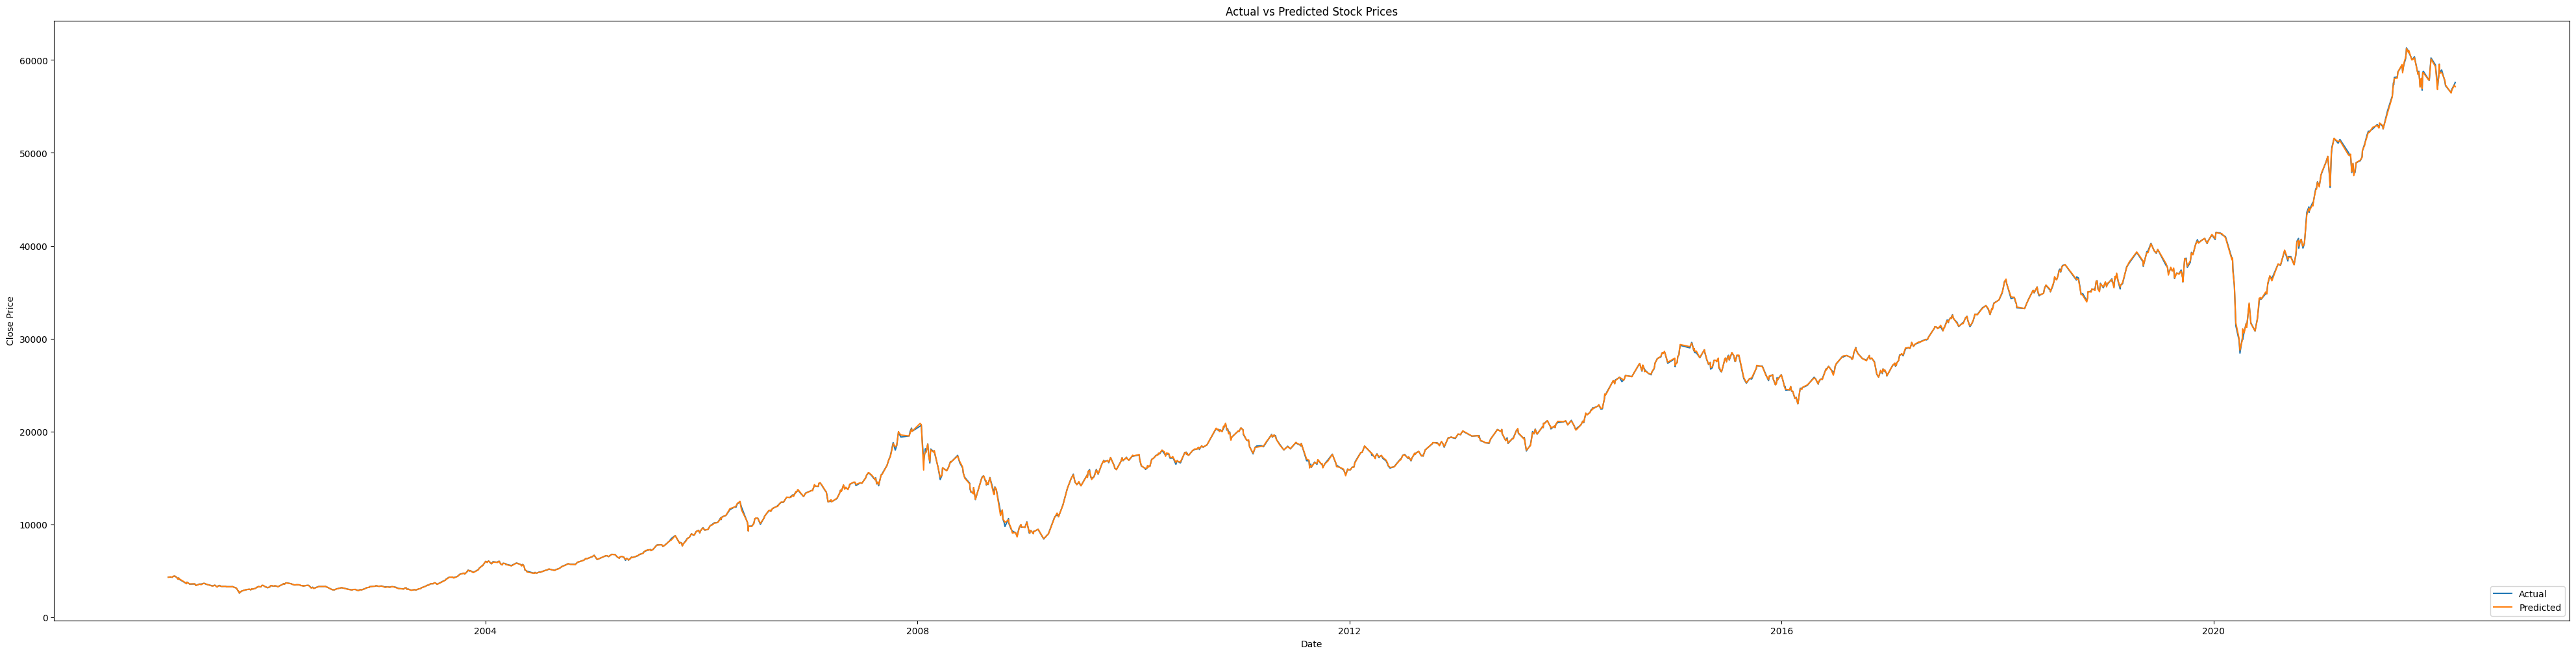

In [51]:
# Plot the actual vs predicted close prices with dates
plt.figure(figsize=(50, 12))
plt.plot(df_plot_Br.index, df_plot_Br['Real Close prices'], label='Actual')
plt.plot(df_plot_Br.index, df_plot_Br['Predicted Close price'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.show()